In [22]:
# multiclass text classification
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [23]:
# load dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dicoding/review_film.csv')

df

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg
...,...,...
24995,"This film is fun, if your a person who likes a...",pos
24996,After seeing this film I feel like I know just...,pos
24997,first this deserves about 5 stars due to actin...,neg
24998,If you like films that ramble with little plot...,neg


In [24]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95):
      print("\nTraning data berhenti, tingkat akurasi > 95%")
      self.model.stop_training = True

callbacks = myCallback()

In [25]:
# encoding
cat = pd.get_dummies(df.sentiment)
df = pd.concat([df, cat], axis = 1)
df = df.drop(columns = 'sentiment')

df

,text,neg,pos
0,"Now, I won't deny that when I purchased this o...",1,0
1,"The saddest thing about this ""tribute"" is that...",1,0
2,Last night I decided to watch the prequel or s...,1,0
3,I have to admit that i liked the first half of...,1,0
4,I was not impressed about this film especially...,1,0
...,...,...,...
24995,"This film is fun, if your a person who likes a...",0,1
24996,After seeing this film I feel like I know just...,0,1
24997,first this deserves about 5 stars due to actin...,1,0
24998,If you like films that ramble with little plot...,1,0


In [26]:
# split dataframe
review = df['text'].values
label = df[['neg', 'pos']].values

review

array(["Now, I won't deny that when I purchased this off eBay, I had high expectations. This was an incredible out-of-print work from the master of comedy that I so enjoy. However, I was soon to be disappointed. Apologies to those who enjoyed it, but I just found the Compleat Al to be very difficult to watch. I got a few smiles, sure, but the majority of the funny came from the music videos (which I've got on DVD) and the rest was basically filler. You could tell that this was not Al's greatest video achievement (that honor goes to UHF). Honestly, I doubt if this will ever make the jump to DVD, so if you're an ultra-hardcore Al fan and just HAVE to own everything, buy the tape off eBay. Just don't pay too much for it.",
       'The saddest thing about this "tribute" is that almost all the singers (including the otherwise incredibly talented Nick Cave) seem to have missed the whole point where Cohen\'s intensity lies: by delivering his lines in an almost tuneless poise, Cohen transmits 

In [27]:
label

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [28]:
from sklearn.model_selection import train_test_split

text = df['text'].values
y = df[['neg', 'pos']].values
text_train, text_test, y_train, y_test = train_test_split(text, y, test_size = 0.2)

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenizer
tokenizer = Tokenizer(num_words = 280617, oov_token = '-')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

# sequences
seq_train = tokenizer.texts_to_sequences(text_train)
seq_test = tokenizer.texts_to_sequences(text_test)

# padding
pad_train = pad_sequences(seq_train, maxlen = 300, padding = 'post', truncating = 'post')

pad_test = pad_sequences(seq_test, maxlen = 300, padding = 'post', truncating = 'post')

In [30]:
# embedding
from tensorflow.keras import layers
from tensorflow.keras import Sequential

model = Sequential([layers.Embedding(280617, 64, input_length = 300),
                    layers.LSTM(64, dropout = 0.1),
                    layers.Dense(128, activation = 'relu'),
                    layers.Dense(64, activation = 'relu'),
                    layers.Dense(2, activation = 'sigmoid')
                    ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 64)           17959488  
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 18,009,218
Trainable params: 18,009,218
Non-trainable params: 0
_________________________________________________________________


In [31]:
# model training
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(pad_train, 
                    y_train, 
                    batch_size = 128, 
                    epochs = 30,
                    validation_data = (pad_test, y_test),
                    verbose = 2,
                    callbacks = [callbacks])

Epoch 1/30
157/157 - 102s - loss: 0.6960 - accuracy: 0.5107 - val_loss: 0.6891 - val_accuracy: 0.5296 - 102s/epoch - 653ms/step
Epoch 2/30
157/157 - 98s - loss: 0.6624 - accuracy: 0.5644 - val_loss: 0.6682 - val_accuracy: 0.5556 - 98s/epoch - 623ms/step
Epoch 3/30
157/157 - 101s - loss: 0.5950 - accuracy: 0.6120 - val_loss: 0.7623 - val_accuracy: 0.7698 - 101s/epoch - 644ms/step
Epoch 4/30
157/157 - 103s - loss: 0.5679 - accuracy: 0.6787 - val_loss: 0.4829 - val_accuracy: 0.8116 - 103s/epoch - 655ms/step
Epoch 5/30
157/157 - 104s - loss: 0.5974 - accuracy: 0.6571 - val_loss: 0.6880 - val_accuracy: 0.5290 - 104s/epoch - 659ms/step
Epoch 6/30
157/157 - 95s - loss: 0.6094 - accuracy: 0.6029 - val_loss: 0.6913 - val_accuracy: 0.5652 - 95s/epoch - 605ms/step
Epoch 7/30
157/157 - 95s - loss: 0.5953 - accuracy: 0.6385 - val_loss: 0.6901 - val_accuracy: 0.5694 - 95s/epoch - 605ms/step
Epoch 8/30
157/157 - 93s - loss: 0.6566 - accuracy: 0.5934 - val_loss: 0.6908 - val_accuracy: 0.5250 - 93s/epo

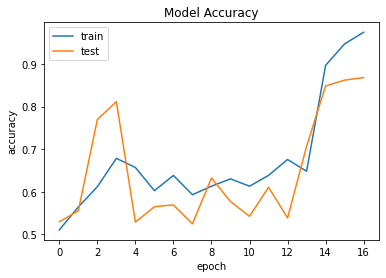

In [32]:
# model accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

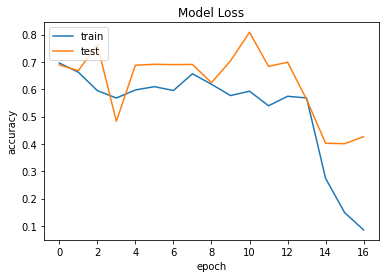

In [33]:
# model loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()